<a href="https://colab.research.google.com/github/oladimeji-kazeem/ITNPAI1/blob/master/Practical_9_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1 :** Import the required packages

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import keras
import tensorflow as tf

**Step 2 :** Import the required Images

In [ ]:
path = "images"
annot = "annotations"

42850.jpg


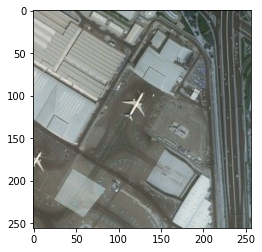

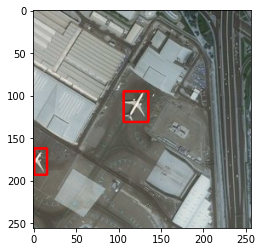

In [ ]:
for e,i in enumerate(os.listdir(annot)):
  if e==10:
    filename = i.split(".")[0]+".jpg"
    print(filename)
    img = cv2.imread(os.path.join(path,filename))
    df = pd.read_csv(os.path.join(annot,i))
    plt.imshow(img)
    for row in df.iterrows():
      x1 = int(row[1][0].split(" ")[0])
      y1 = int(row[1][0].split(" ")[1])
      x2 = int(row[1][0].split(" ")[2])
      y2 = int(row[1][0].split(" ")[3])
      cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), 2)
    plt.figure()
    plt.imshow(img)
    break


**Step 3 :** Selective search
*   Use OpenCV function for selective search for potential foreground objects and visualise them.




In [ ]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

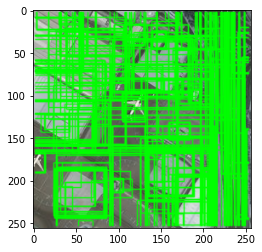

In [ ]:
im = cv2.imread(os.path.join(path,filename))
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
  x, y, w, h = rect
  cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
plt.imshow(imOut)


**Step 4 :** Intersection over union
*   Intersection over union(IoU) are important to understand / calculate the overlap between the detected region and the ground truth(actual image).

In [ ]:
def get_iou(bb1, bb2):
  assert bb1['x1'] < bb1['x2']
  assert bb1['y1'] < bb1['y2']
  assert bb2['x1'] < bb2['x2']
  assert bb2['y1'] < bb2['y2']
  x_left = max(bb1['x1'], bb2['x1'])
  y_top = max(bb1['y1'], bb2['y1'])
  x_right = min(bb1['x2'], bb2['x2'])
  y_bottom = min(bb1['y2'], bb2['y2'])
  if x_right < x_left or y_bottom < y_top:
    return 0.0
  intersection_area = (x_right - x_left) * (y_bottom - y_top)
  bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
  bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])
  iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
  assert iou >= 0.0
  assert iou <= 1.0
  return iou


**Step 5 :** Preprocessing and creation of dataset
- In this practical, we creat two classes: forground objects (airplane) and background (everything
else) with labels 1 and 0, respectively. This is done through selective search to create the regions for
the proposals. Each of these regions are then treated as seprate image to pass on to the classifier.
One single image can have multiple regions and top 2000 regions are considered as proposed in
the original paper. Regions with more than 0.7 IoUs are labeled as the foreground (or airplane)
objects. We loop through the entire training set available.

In [ ]:
train_images=[]
train_labels=[]


In [ ]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [ ]:
for e,i in enumerate(os.listdir(annot)):
  try:
    if i.startswith("airplane"):
      filename = i.split(".")[0]+".jpg"
      print(e,filename)
      image = cv2.imread(os.path.join(path,filename))
      df = pd.read_csv(os.path.join(annot,i))
      gtvalues=[]
      for row in df.iterrows():
        x1 = int(row[1][0].split(" ")[0])
        y1 = int(row[1][0].split(" ")[1])
        x2 = int(row[1][0].split(" ")[2])
        y2 = int(row[1][0].split(" ")[3])
        gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
      ss.setBaseImage(image)
      ss.switchToSelectiveSearchFast()
      ssresults = ss.process()
      imout = image.copy()
      counter = 0
      falsecounter = 0
      flag = 0
      fflag = 0
      bflag = 0
      for e,result in enumerate(ssresults):
        if e < 2000 and flag == 0:
          for gtval in gtvalues:
            x,y,w,h = result
            iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
            if counter < 30:
              if iou > 0.70:
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                train_images.append(resized)
                train_labels.append(1)
                counter += 1
            else :
                fflag =1
            if falsecounter <30:
                if iou < 0.3:
                  timage = imout[y:y+h,x:x+w]
                  resized = cv2.resize(timage, (224,224),interpolation = cv2.INTER_AREA)
                  train_images.append(resized)
                  train_labels.append(0)
                  falsecounter += 1
            else :
                bflag = 1
        if fflag == 1 and bflag == 1:
                print("inside")
                flag = 1
  except Exception as e:
                print(e)
                print("error in "+filename)
                continue



Streaming output truncated to the last 5000 lines.
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
70 airplane_301.jpg
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
inside
insid

In [ ]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [ ]:
X_new.shape

(30229, 224, 224, 3)

**Step 6:** Use of trained model for classification
- As a main part of this algorithm is to classify, we use a standard pre-trained classifier VGG16 and
fine tune it. The VGG16 classifier is already train on ImageNet (https://www.image-net.org/) on
1000 classes. VGG16 is already available through Keras framework and can readily be used. This
implementation also passed a few parameters that are optimal / required in this case.
- Please note that, a different pre-trained classifier can also be used.
- As we just need two classes for this lab, we freeze the first 15 layers of the model followed by taking
out the second last layer of the model and then adding a 2 unit softmax dense layers for prediction
(2 classes: foreground or background).

In [ ]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [ ]:
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()

553476096/553467096 [==============================] - 12s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [ ]:
for layers in (vggmodel.layers)[:15]:
  print(layers)
  layers.trainable = False


In [ ]:
X= vggmodel.layers[-2].output

In [ ]:
predictions = Dense(2, activation="softmax")(X)

In [ ]:
model_final = Model(vggmodel.input, predictions)

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.0001)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])

In [ ]:
model_final.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

**Step 7 :** Preparation of training and testing data
- Split the dataset in train and test / validation set. However a preprocessing is required which was
achieved through one-hot encoding using and function called MyLabelBinarizer(). Further reading:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [ ]:
class MyLabelBinarizer(LabelBinarizer):
  def transform(self, y):
    Y = super().transform(y)
    if self.y_type_ == 'binary':
      return np.hstack((Y, 1-Y))
    else:
      return Y
  def inverse_transform(self, Y, threshold=None):
    if self.y_type_ == 'binary':
      return super().inverse_transform(Y[:, 0], threshold)
    else:
      return super().inverse_transform(Y, threshold)

In [ ]:
lenc = MyLabelBinarizer()
Y = lenc.fit_transform(y_new)

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.10)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

In [ ]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

NameError: ignored